In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
train = pd.read_csv('data/따릉이/train.csv')
test = pd.read_csv('data/따릉이/test.csv')

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


* id 고유 id
* hour 시간
* temperature 기온
* precipitation 비가 오지 않았으면 0, 비가 오면 1
* windspeed 풍속(평균)
* humidity 습도
* visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone 오존
* pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count 시간에 따른 따릉이 대여 수

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [5]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [6]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

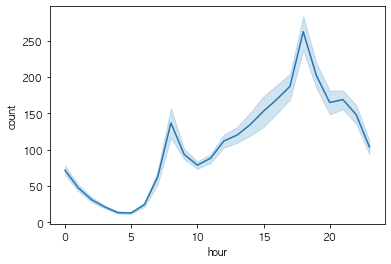

In [7]:
sns.lineplot(data=train, x='hour', y='count')

In [8]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot:xlabel='hour_bef_visibility', ylabel='hour_bef_pm2.5'>

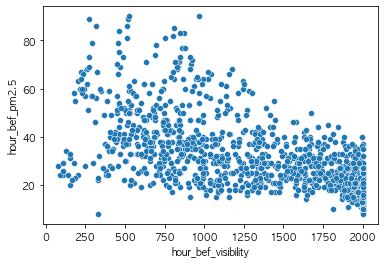

In [9]:
sns.scatterplot(data=train, x='hour_bef_visibility', y='hour_bef_pm2.5')

<AxesSubplot:xlabel='hour_bef_pm10', ylabel='hour_bef_pm2.5'>

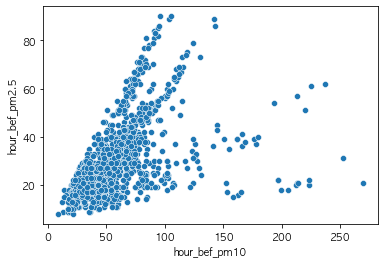

In [10]:
sns.scatterplot(data=train, x='hour_bef_pm10', y='hour_bef_pm2.5')

<AxesSubplot:xlabel='hour_bef_windspeed', ylabel='hour_bef_ozone'>

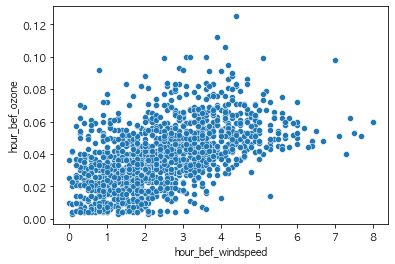

In [11]:
sns.scatterplot(data=train, x='hour_bef_windspeed', y='hour_bef_ozone')

In [12]:
target_y = train['count']
all_data = pd.concat([train.drop('count', axis=1), test])

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2174 non-null   int64  
 1   hour                    2174 non-null   int64  
 2   hour_bef_temperature    2171 non-null   float64
 3   hour_bef_precipitation  2171 non-null   float64
 4   hour_bef_windspeed      2164 non-null   float64
 5   hour_bef_humidity       2171 non-null   float64
 6   hour_bef_visibility     2171 non-null   float64
 7   hour_bef_ozone          2063 non-null   float64
 8   hour_bef_pm10           2047 non-null   float64
 9   hour_bef_pm2.5          2021 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 186.8 KB


In [14]:
all_data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        3
hour_bef_precipitation      3
hour_bef_windspeed         10
hour_bef_humidity           3
hour_bef_visibility         3
hour_bef_ozone            111
hour_bef_pm10             127
hour_bef_pm2.5            153
dtype: int64

In [15]:
all_data['hour_bef_temperature'] = all_data['hour_bef_temperature'].fillna(all_data['hour_bef_temperature'].median())

In [16]:
all_data['hour_bef_precipitation'] = all_data['hour_bef_precipitation'].fillna(all_data['hour_bef_precipitation'].median())

In [17]:
all_data['hour_bef_windspeed'] = all_data['hour_bef_windspeed'].fillna(all_data['hour_bef_windspeed'].median())

In [18]:
all_data['hour_bef_humidity'] = all_data['hour_bef_humidity'].fillna(all_data['hour_bef_humidity'].median())

In [19]:
all_data['hour_bef_visibility'] = all_data['hour_bef_visibility'].fillna(all_data['hour_bef_visibility'].median())

In [20]:
all_data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone            111
hour_bef_pm10             127
hour_bef_pm2.5            153
dtype: int64

In [21]:
corr_df = all_data.corr()
corr_df

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
id,1.000000,-0.014830,-0.025362,-0.066828,0.004529,-0.007903,0.000142,0.037808,-0.004379,0.017404
hour,-0.014830,1.000000,0.357727,0.015470,0.471815,-0.335856,0.185259,0.382602,-0.010968,-0.028588
hour_bef_temperature,-0.025362,0.357727,1.000000,-0.089735,0.299181,-0.378995,0.132982,0.481608,-0.144774,-0.095761
hour_bef_precipitation,-0.066828,0.015470,-0.089735,1.000000,-0.020372,0.319609,-0.255039,-0.066411,-0.078351,-0.027925
hour_bef_windspeed,0.004529,0.471815,0.299181,-0.020372,1.000000,-0.422231,0.238993,0.515380,0.035498,-0.133032
hour_bef_humidity,-0.007903,-0.335856,-0.378995,0.319609,-0.422231,1.000000,-0.624159,-0.407500,-0.115742,0.148253
hour_bef_visibility,0.000142,0.185259,0.132982,-0.255039,0.238993,-0.624159,1.000000,0.052832,-0.347802,-0.602367
hour_bef_ozone,0.037808,0.382602,0.481608,-0.066411,0.515380,-0.407500,0.052832,1.000000,0.132860,0.106683
hour_bef_pm10,-0.004379,-0.010968,-0.144774,-0.078351,0.035498,-0.115742,-0.347802,0.132860,1.000000,0.556364
hour_bef_pm2.5,0.017404,-0.028588,-0.095761,-0.027925,-0.133032,0.148253,-0.602367,0.106683,0.556364,1.000000


In [22]:
all_data.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

In [23]:
from collections import defaultdict

var_list = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility']
get_list = ['hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
res = defaultdict(set)
for g in get_list:
    for v1 in get_list:
        if not (-0.2 < corr_df[g][v1] < 0.2):
            for v2 in var_list:
                if -0.2 < corr_df[v1][v2] < 0.2:
                    res[g].add(v2)
print(res)

defaultdict(<class 'set'>, {'hour_bef_ozone': {'hour_bef_precipitation', 'hour_bef_visibility'}, 'hour_bef_pm10': {'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_precipitation', 'hour_bef_temperature', 'hour'}, 'hour_bef_pm2.5': {'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_precipitation', 'hour_bef_temperature', 'hour'}})


In [24]:
from sklearn.linear_model import LinearRegression

ozone_model = LinearRegression()
ozone_x = all_data[list(res['hour_bef_ozone'])]
ozone_x.head()

,hour_bef_precipitation,hour_bef_visibility
0,1.0,576.0
1,0.0,916.0
2,0.0,1382.0
3,0.0,946.0
4,0.0,2000.0


In [25]:
ozone_y = all_data[['hour_bef_ozone']]
# ozone_y = np.expand_dims(ozone_y, axis=1)
ozone_y.head()

,hour_bef_ozone
0,0.027
1,0.042
2,0.033
3,0.040
4,0.057


In [26]:
ozone_data = pd.concat([ozone_x, ozone_y], axis=1)
ozone_data.head()

,hour_bef_precipitation,hour_bef_visibility,hour_bef_ozone
0,1.0,576.0,0.027
1,0.0,916.0,0.042
2,0.0,1382.0,0.033
3,0.0,946.0,0.040
4,0.0,2000.0,0.057


In [27]:
ozone_data = ozone_data.dropna(axis=0)
ozone_data.isnull().sum()

hour_bef_precipitation    0
hour_bef_visibility       0
hour_bef_ozone            0
dtype: int64

In [28]:
ozone_x = ozone_data[list(res['hour_bef_ozone'])].values
ozone_y = ozone_data[['hour_bef_ozone']].values

In [29]:
ozone_model.fit(ozone_x, ozone_y)
ozone_model.score(ozone_x, ozone_y)

0.005825443473775227

In [30]:
from sklearn.metrics import mean_squared_error

o_pred = ozone_model.predict(ozone_x)
print(mean_squared_error(y_true=ozone_y, y_pred=o_pred))

0.0003940284234083311


In [31]:
pm10_model = LinearRegression()

a = all_data[list(res['hour_bef_pm10'])]
b = all_data[['hour_bef_pm10']]
pm10_data = pd.concat([a, b], axis=1)
pm10_data = pm10_data.dropna(axis=0)
pm10_x = pm10_data[list(res['hour_bef_pm10'])].values
pm10_y = pm10_data[['hour_bef_pm10']].values

In [32]:
print(pm10_x.shape, pm10_y.shape)

(2047, 5) (2047, 1)


In [33]:
pm10_model.fit(pm10_x, pm10_y)

pm10_pred = pm10_model.predict(pm10_x)
print(mean_squared_error(y_true=pm10_y, y_pred=pm10_pred))

771.1720098575532


In [34]:
pm10_model.score(pm10_x, pm10_y)

0.05742555768718116

In [35]:
pm25_model = LinearRegression()

a = all_data[list(res['hour_bef_pm2.5'])]
b = all_data[['hour_bef_pm2.5']]
pm25_data = pd.concat([a, b], axis=1)
pm25_data = pm25_data.dropna(axis=0)
pm25_data.head()
pm25_x = pm25_data[list(res['hour_bef_pm2.5'])].values
pm25_y = pm25_data[['hour_bef_pm2.5']].values

In [36]:
pm25_model.fit(pm25_x, pm25_y)

pm25_pred = pm25_model.predict(pm25_x)
print(mean_squared_error(y_true=pm25_y, y_pred=pm25_pred))

176.98795170851716


In [37]:
pm25_model.score(pm25_x, pm25_y)

0.0390254766234589

`ozone_model` 만 사용해서 결측치 채우기로 한다

In [38]:

ozone_pred = ozone_model.predict(all_data.loc[:, list(res['hour_bef_ozone'])])
ozone_pred

/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[0.03305315],
       [0.03942932],
       [0.0400371 ],
       ...,
       [0.04056792],
       [0.04078573],
       [0.03990015]])

In [39]:
all_data['hour_bef_ozone'].fillna(pd.Series(ozone_pred.flatten()), inplace=True)
all_data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone              0
hour_bef_pm10             127
hour_bef_pm2.5            153
dtype: int64

In [40]:
all_data['hour_bef_pm10'].fillna(all_data['hour_bef_pm10'].median(), inplace=True)
all_data['hour_bef_pm2.5'].fillna(all_data['hour_bef_pm2.5'].median(), inplace=True)

In [41]:
all_data.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [42]:
train = all_data.iloc[:1459]
test = all_data.iloc[1459:]

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 125.4 KB


In [44]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    715 non-null    float64
 3   hour_bef_precipitation  715 non-null    float64
 4   hour_bef_windspeed      715 non-null    float64
 5   hour_bef_humidity       715 non-null    float64
 6   hour_bef_visibility     715 non-null    float64
 7   hour_bef_ozone          715 non-null    float64
 8   hour_bef_pm10           715 non-null    float64
 9   hour_bef_pm2.5          715 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 61.4 KB


In [46]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [47]:
target_y

0        49.0
1       159.0
2        26.0
3        57.0
4       431.0
        ...  
1454     21.0
1455     20.0
1456     22.0
1457    216.0
1458    170.0
Name: count, Length: 1459, dtype: float64

## 학습

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [51]:
train_x, val_x, train_y, val_y = train_test_split(train, target_y, test_size=0.2)

In [52]:
rfr_model = RandomForestRegressor()

rfr_model.fit(train_x, train_y)

RandomForestRegressor()

In [53]:
rfr_model.score(train_x, train_y)

0.9672193409282941

In [54]:
rfr_model.score(val_x, val_y)

0.817061247577389

In [57]:
rfr_pred = rfr_model.predict(train_x.values)
mean_squared_error(y_pred=rfr_pred, y_true=train_y) ** 0.5

/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


14.953691863307844

In [58]:
rfr_pred = rfr_model.predict(val_x.values)
mean_squared_error(y_pred=rfr_pred, y_true=val_y) ** 0.5

/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


35.329805861224045

### Support Vector Machine

In [60]:
from sklearn.svm import SVR

In [61]:
svr_model = SVR()

svr_model.fit(train_x, train_y)

SVR()

In [62]:
svr_pred = svr_model.predict(train_x.values)
mean_squared_error(y_pred=svr_pred, y_true=train_y) ** 0.5

/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


79.69452549685305

In [63]:
svr_pred = svr_model.predict(val_x.values)
mean_squared_error(y_pred=svr_pred, y_true=val_y) ** 0.5

/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


80.50358850506282

### Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
gvr_model = GradientBoostingRegressor()

gvr_model.fit(train_x, train_y)

GradientBoostingRegressor()

In [66]:
gvr_pred = gvr_model.predict(train_x.values)
mean_squared_error(y_pred=gvr_pred, y_true=train_y) ** 0.5

/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


31.425003457991142

In [67]:
gvr_pred = gvr_model.predict(val_x.values)
mean_squared_error(y_pred=gvr_pred, y_true=val_y) ** 0.5

/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


37.30528523695869

## 제출 파일 만들기

In [68]:
result = pd.read_csv('data/따릉이/submission.csv')
result.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [69]:
rfr_pred_result = rfr_model.predict(test)

In [70]:
result['count'] = rfr_pred_result

In [74]:
result.head(10)

,id,count
0,0,86.08
1,1,246.64
2,2,110.20
3,4,31.74
4,5,67.56
5,10,133.16
6,11,207.13
7,12,321.32
8,15,33.22
9,17,134.64


In [73]:
result.to_csv('data/따릉이/random_forest_submission.csv', index=False)

## 파라미터 조절

In [75]:
rfr_model = RandomForestRegressor()

rfr_model.fit(train_x, train_y)

rfr_pred = rfr_model.predict(train_x.values)
print(mean_squared_error(y_pred=rfr_pred, y_true=train_y) ** 0.5)

rfr_pred = rfr_model.predict(val_x.values)
print(mean_squared_error(y_pred=rfr_pred, y_true=val_y) ** 0.5)

14.911379507526481
35.4959765373833


/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
rfr_model = RandomForestRegressor()

rfr_model.fit(train_x, train_y)

rfr_pred = rfr_model.predict(train_x.values)
print(mean_squared_error(y_pred=rfr_pred, y_true=train_y) ** 0.5)

rfr_pred = rfr_model.predict(val_x.values)
print(mean_squared_error(y_pred=rfr_pred, y_true=val_y) ** 0.5)

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [79]:
rfr_model = RandomForestRegressor()

random_rfr_model = RandomizedSearchCV(estimator=rfr_model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_rfr_model.fit(train_x, train_y)

rrfr_pred = random_rfr_model.predict(train_x.values)
print(mean_squared_error(y_pred=rrfr_pred, y_true=train_y) ** 0.5)

rrfr_pred = random_rfr_model.predict(val_x.values)
print(mean_squared_error(y_pred=rrfr_pred, y_true=val_y) ** 0.5)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200

/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


17.875987377834825
35.7426591624783


/Users/elpion/miniconda3/envs/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [80]:
random_rfr_model.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}